In [1]:
# from onekey_algo.custom.Manager import onekey_show

# onekey_show('模型可解释性-SHAP')

In [2]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os

model_path = r'E:\TASK1\调参761\sol21. 要models生境分析-(多)单中心-不同区域对比-临床\models\Habitat__ExtraTrees_label.pkl'
feature_path = r'E:\TASK1\调参761\comp6-可解释性\SHAP特征\final_featuresITHall.csv'
analysis_label = 1
analysis_sample = 600

# 模型全部样本的SHAP分布

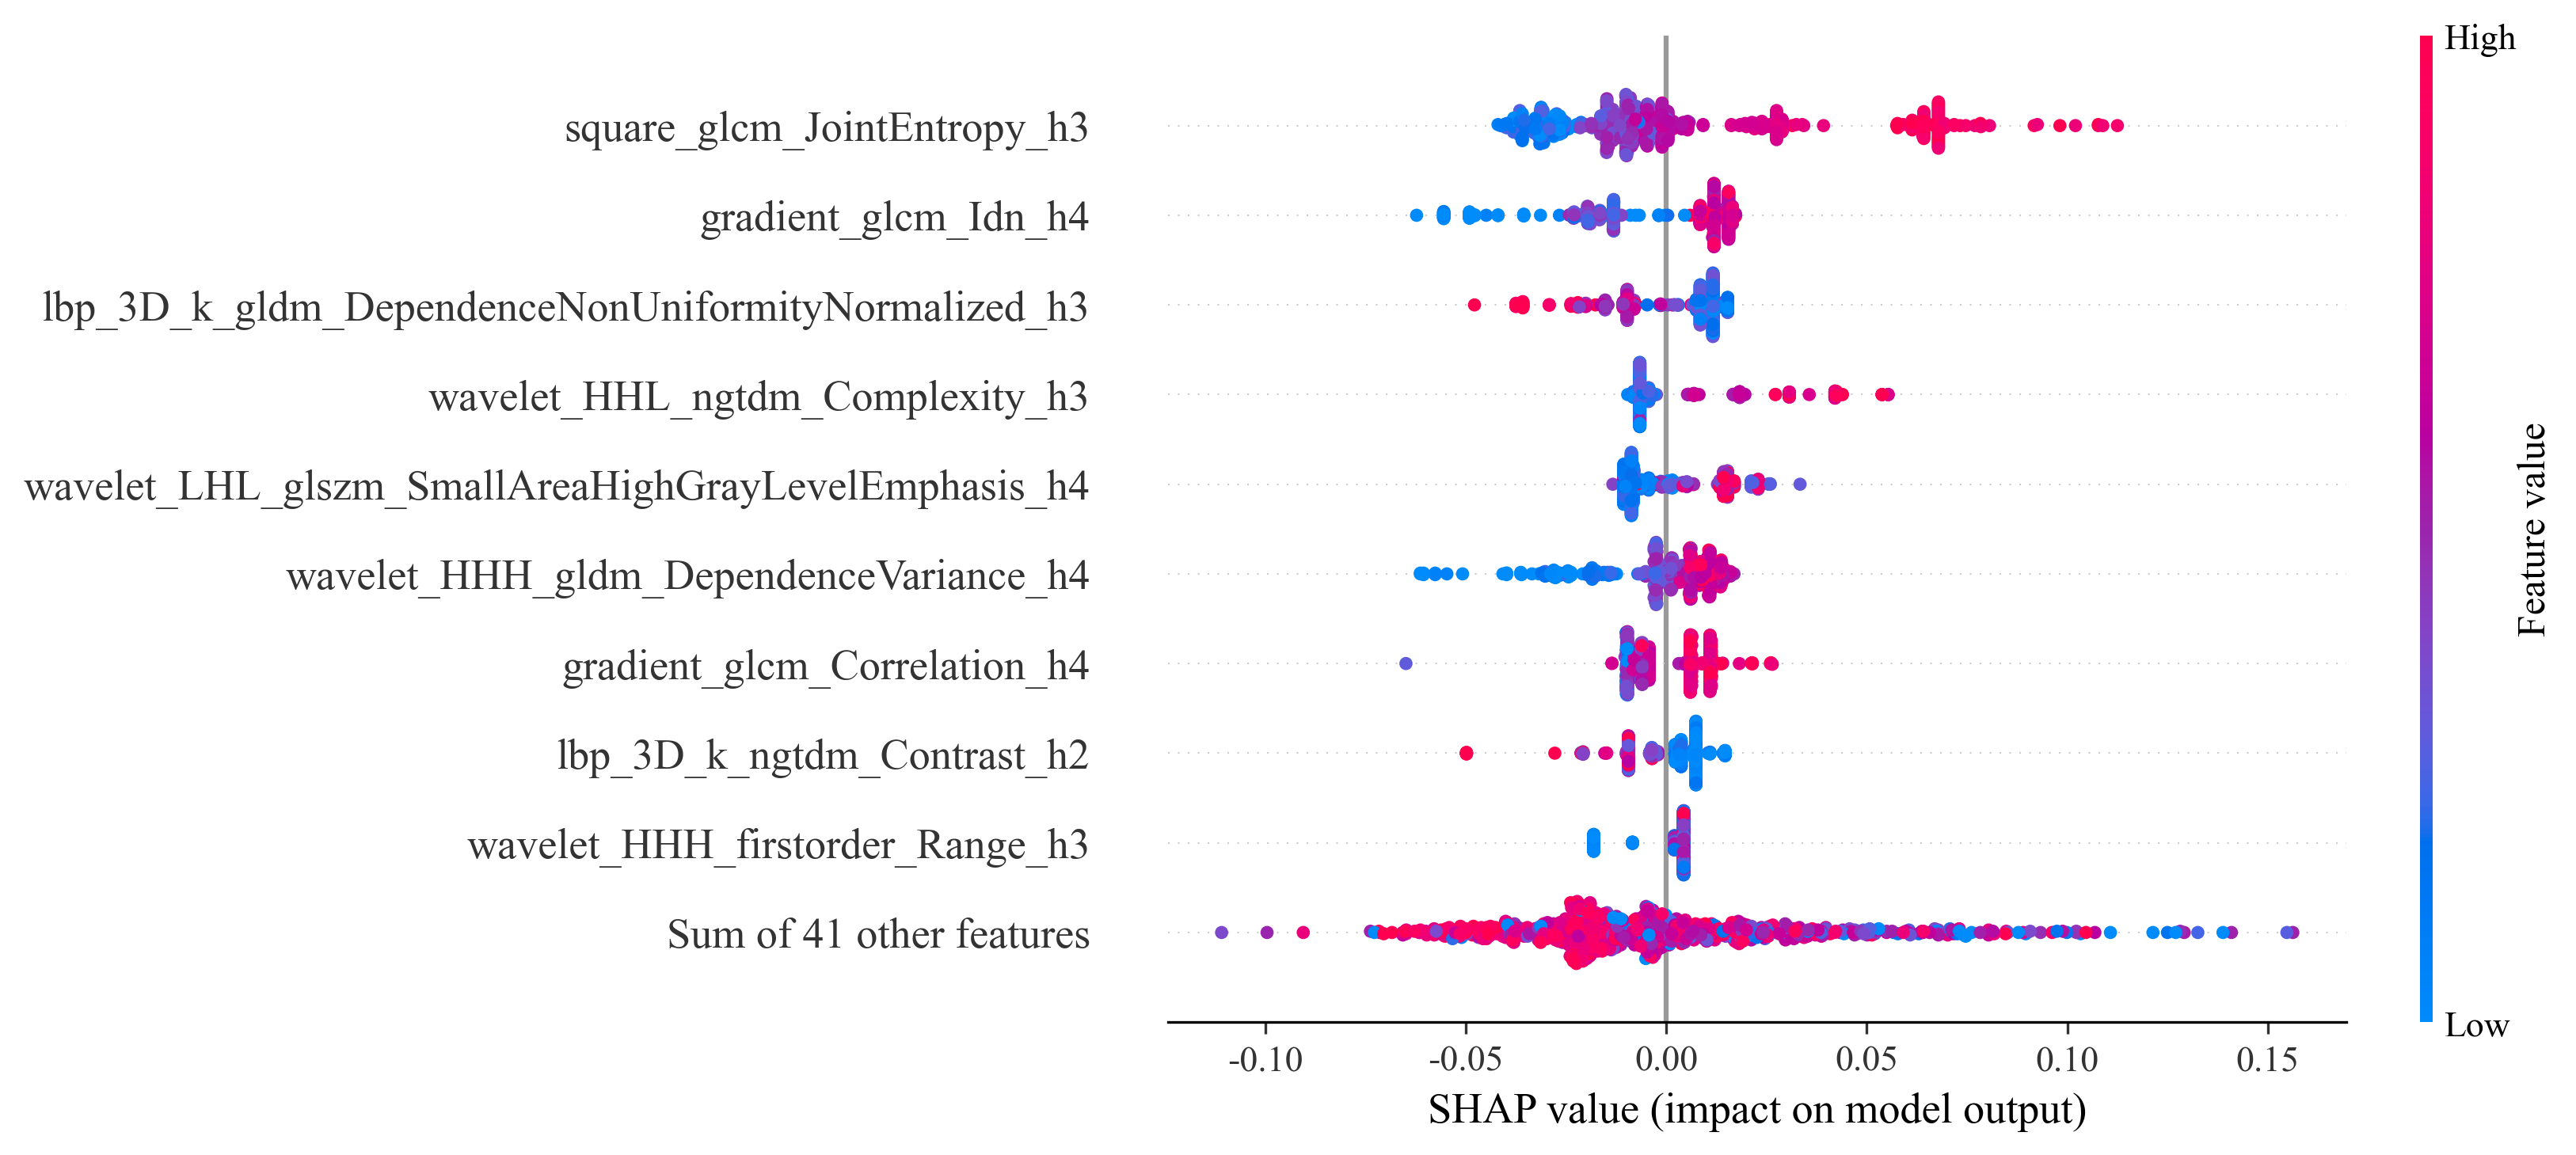

In [3]:
from onekey_algo.custom.viz.shap_clf import get_explainer, get_shap_value

os.makedirs('img', exist_ok=True)
explainer, model, features, shap_values = get_explainer(model_path, feature_path)
shap_value = get_shap_value(shap_values, analysis_label=analysis_label)
shap.plots.beeswarm(shap_value, show=False, max_display=10)
plt.savefig(f"img/feature_shap_value_distribution.svg", bbox_inches='tight')
plt.show()

# 具体某个样本的可解释性

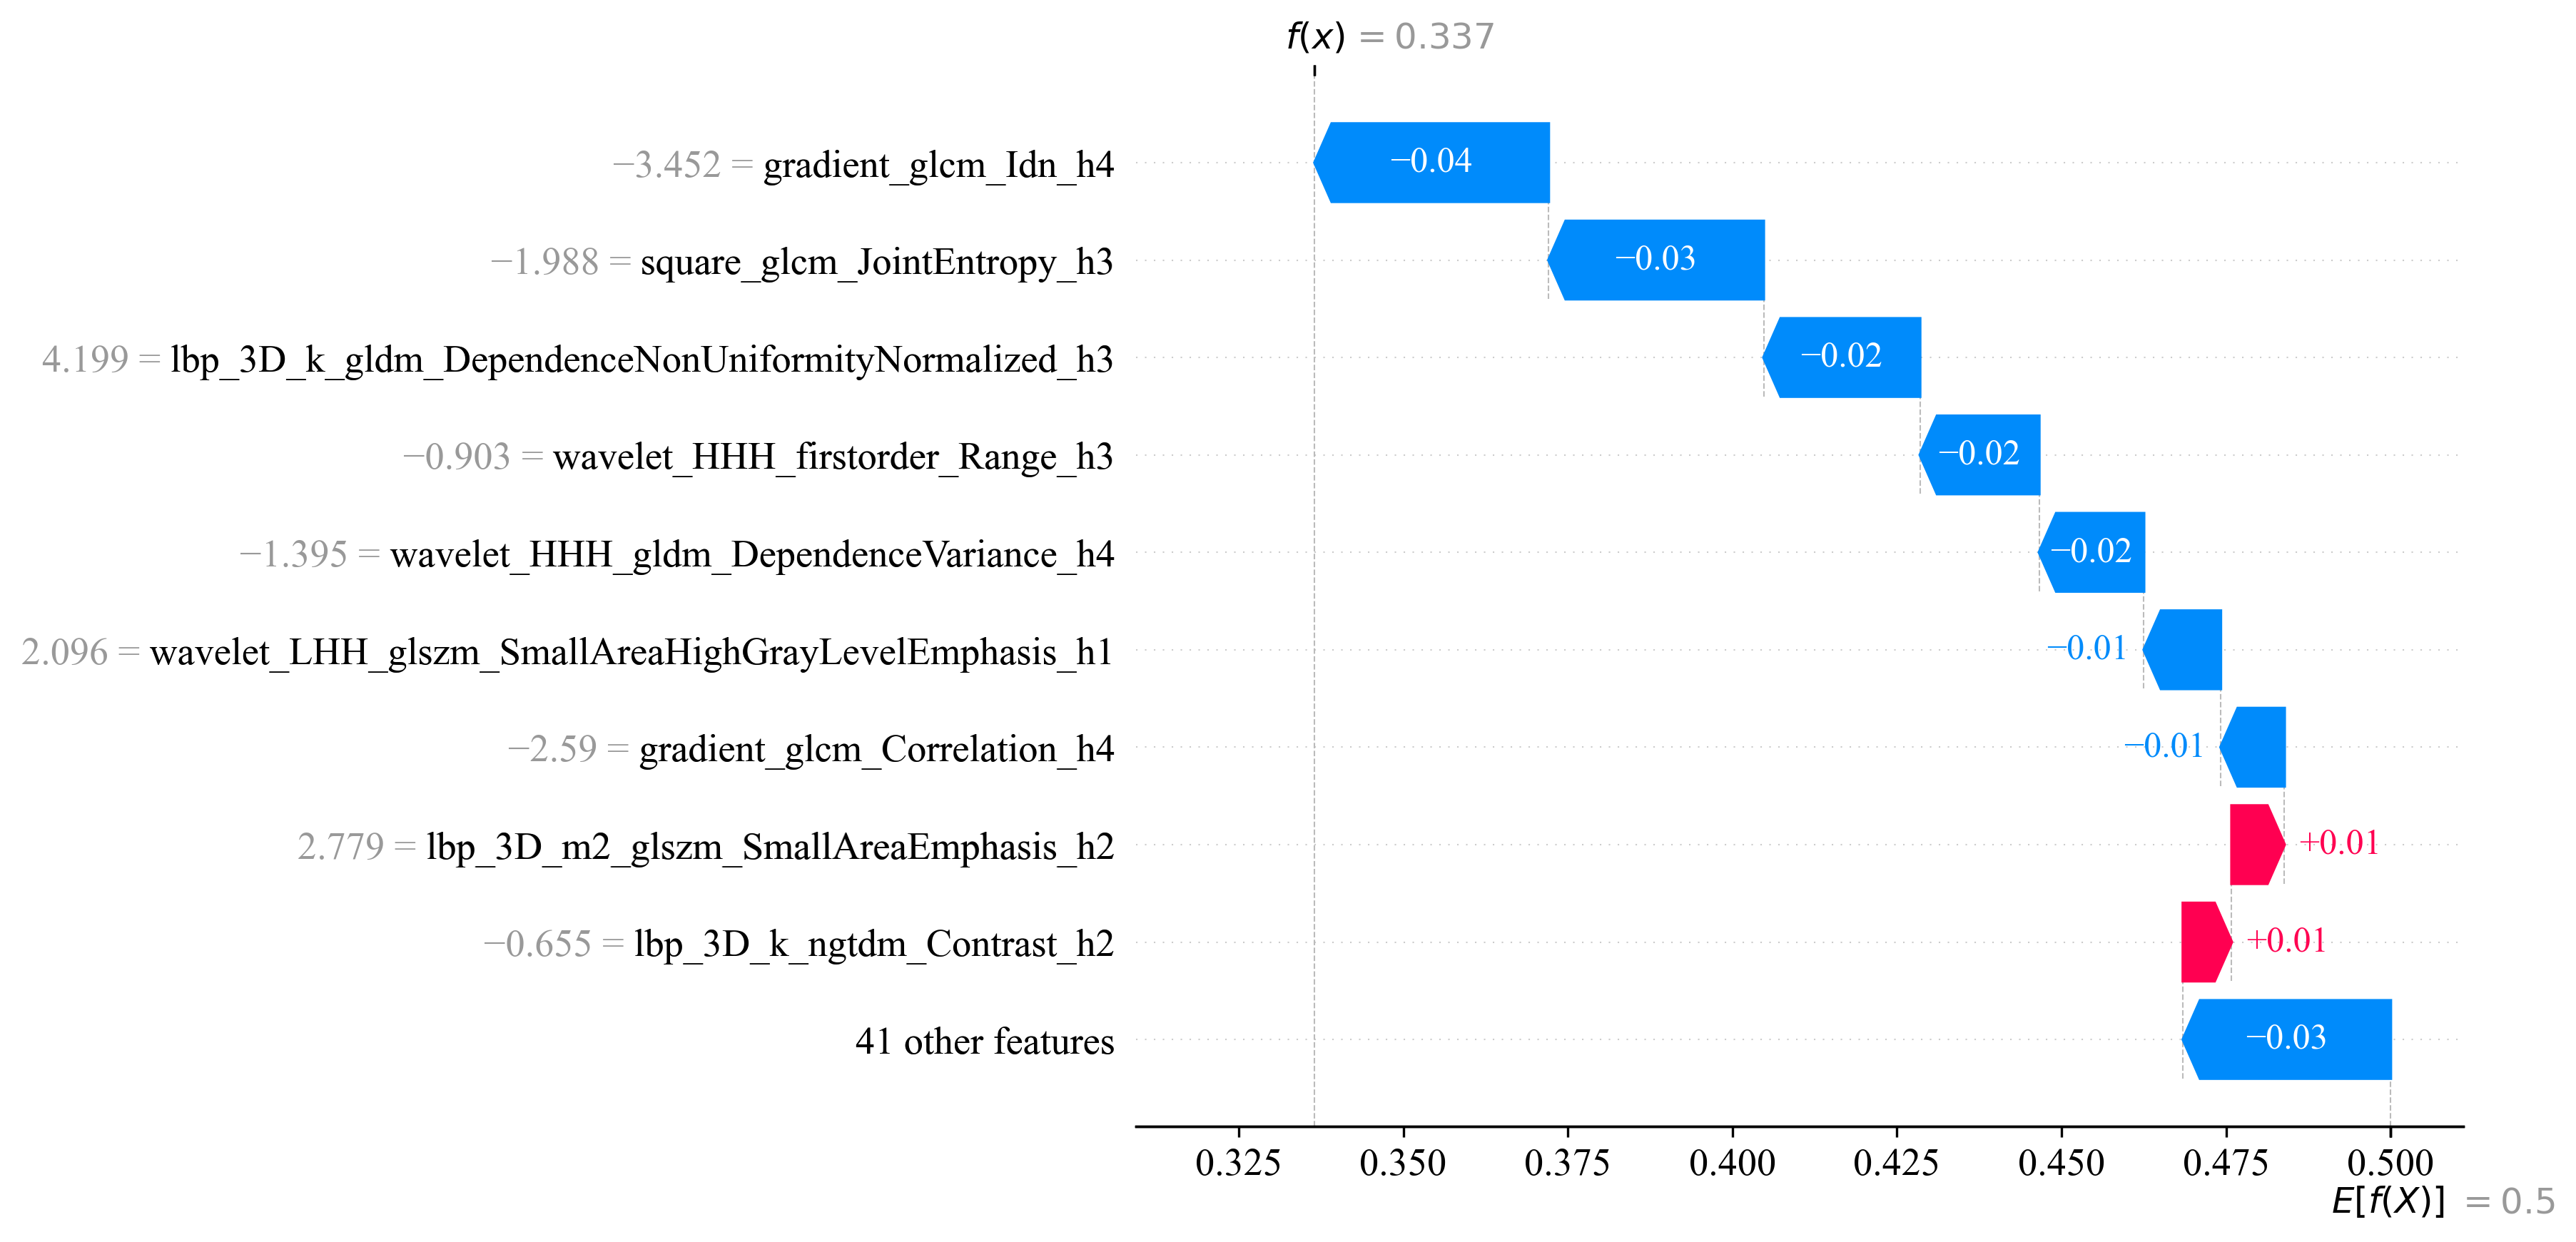

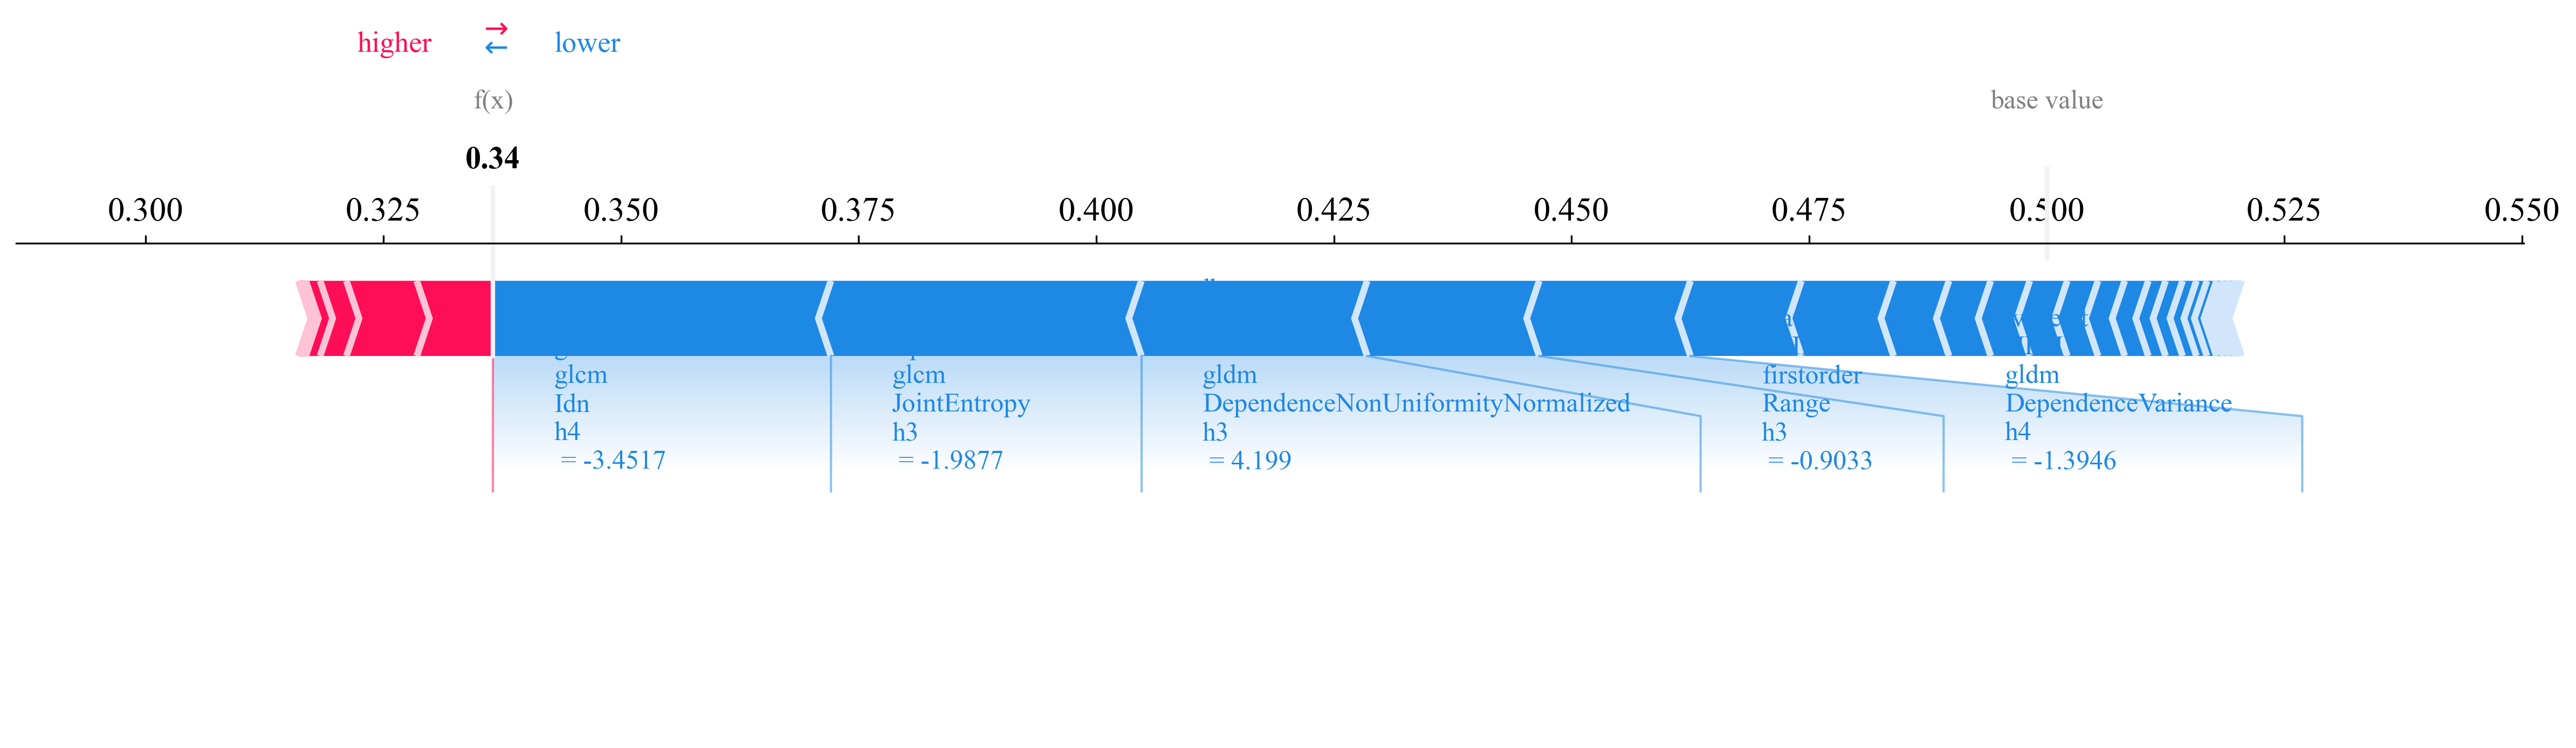

In [4]:
shap_value = get_shap_value(shap_values, analysis_label=analysis_label, samples=analysis_sample)
shap.plots.waterfall(shap_value, max_display=10, show=False)
plt.savefig(f"img/{analysis_sample}_waterfall.svg", bbox_inches='tight')
plt.show()
shap_value.feature_names = [f.replace('_', '\n') + '\n' for f in shap_value.feature_names]
shap.plots.force(shap_value, show=False, matplotlib=True, figsize=(20, 4))
plt.savefig(f"img/{analysis_sample}_force.svg", bbox_inches='tight')
plt.show()